<a href="https://colab.research.google.com/github/bagavijit418/NLP_ALGO_POC/blob/master/Practice_FastText_with_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><u><H1>FastText with Gensim</H1></u></center>

## Importing Libraries

In [0]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
from nltk.corpus import gutenberg
%matplotlib inline

Using TensorFlow backend.


## Importing dataset

In [0]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [0]:
bible=gutenberg.raw('blake-poems.txt')

bible

'[Poems by William Blake 1789]\n\n \nSONGS OF INNOCENCE AND OF EXPERIENCE\nand THE BOOK of THEL\n\n\n SONGS OF INNOCENCE\n \n \n INTRODUCTION\n \n Piping down the valleys wild,\n   Piping songs of pleasant glee,\n On a cloud I saw a child,\n   And he laughing said to me:\n \n "Pipe a song about a Lamb!"\n   So I piped with merry cheer.\n "Piper, pipe that song again;"\n   So I piped: he wept to hear.\n \n "Drop thy pipe, thy happy pipe;\n   Sing thy songs of happy cheer:!"\n So I sang the same again,\n   While he wept with joy to hear.\n \n "Piper, sit thee down and write\n   In a book, that all may read."\n So he vanish\'d from my sight;\n   And I pluck\'d a hollow reed,\n \n And I made a rural pen,\n   And I stain\'d the water clear,\n And I wrote my happy songs\n   Every child may joy to hear.\n \n \n THE SHEPHERD\n \n How sweet is the Shepherd\'s sweet lot!\n From the morn to the evening he stays;\n He shall follow his sheep all the day,\n And his tongue shall be filled with praise

In [0]:
bible_sents = sent_tokenize(bible)
bible_sents

In [0]:
print('Total lines:', len(bible_sents))

Total lines: 355


## Cleaning the text:

In [0]:
remove_terms = punctuation + '0123456789'

In [0]:
def preprocessing(text):

    words=word_tokenize(text)

    tokens = [w for w in words if w.lower() not in remove_terms]


    stop_words=stopwords.words('english')
    tokens=[w for w in tokens if w not in stop_words]


    tokens=[w for w in tokens if w.isalpha()]
    lemma=WordNetLemmatizer()

    tokens=[lemma.lemmatize(word) for word in tokens]

    preprocessed_text='  '.join(tokens)
    return preprocessed_text

In [0]:
corpus = [preprocessing(sentence) for sentence in bible_sents if sentence.strip() !='']
corpus[10:20]

['THE  ECHOING  GREEN  The  sun  arise  And  make  happy  sky  The  merry  bell  ring  To  welcome  Spring  The  skylark  thrush  The  bird  bush  Sing  louder  around  To  bell  cheerful  sound  While  sport  shall  seen  On  echoing  Green',
 'Old  John  white  hair  Does  laugh  away  care  Sitting  oak  Among  old  folk',
 'They  laugh  play  And  soon  say  Such  joy  When  girl  boy  In  seen  On  echoing  Green',
 'Till  little  one  weary  No  merry  The  sun  descend  And  sport  end',
 'Round  lap  mother  Many  sister  brother  Like  bird  nest  Are  ready  rest  And  sport  seen  On  darkening  green',
 'THE  LAMB  Little  Lamb  make  thee  Dost  thou  know  made  thee  Gave  thee  life  bid  thee  feed  By  stream  mead  Gave  thee  clothing  delight  Softest  clothing  wolly  bright  Gave  thee  tender  voice  Making  vale  rejoice',
 'Little  Lamb  made  thee',
 'Dost  thou  know  made  thee',
 'Little  Lamb  I  tell  thee  Little  Lamb  I  tell  thee  He  called  thy  n

In [0]:
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(doc) for doc in corpus]
tokenized_corpus[1]

['So', 'I', 'piped', 'merry', 'cheer']

## Training the Model:

In [0]:
feature_size = 50   # Word embedding vector dimensionality  
window_context = 30  # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

In [0]:
%%time
fasttext_model=FastText(tokenized_corpus,
                        size=feature_size,
                        window=window_context,
                        min_count=min_word_count,
                        sg=1,
                        sample=sample,
                        iter=100
                       )
                        

W0725 08:37:40.932097 140581431510912 base_any2vec.py:723] consider setting layer size to a multiple of 4 for greater performance


CPU times: user 1.92 s, sys: 312 ms, total: 2.23 s
Wall time: 2.23 s


## Model parameters: 
##### - model: Training architecture. Allowed values: `cbow`, `skipgram` (Default `cbow`)
##### - size: Size of embeddings to be learnt (Default 100)
##### - alpha: Initial learning rate (Default 0.025)
##### - window: Context window size (Default 5)
##### - min_count: Ignore words with number of occurrences below this (Default 5)
##### - loss: Training objective. Allowed values: `ns`, `hs`, `softmax` (Default `ns`)
##### - sample: Threshold for downsampling higher-frequency words (Default 0.001)
##### - negative: Number of negative words to sample, for `ns` (Default 5)
##### - iter: Number of epochs (Default 5)
##### - sorted_vocab: Sort vocab by descending frequency (Default 1)
##### - threads: Number of threads to use (Default 12)
##### - min_n: min length of char ngrams (Default 3)
##### - max_n: max length of char ngrams (Default 6)
##### - bucket: number of buckets used for hashing ngrams (Default 2000000)

## Semantic Similarities:

In [0]:
print(fasttext_model.wv['god'])

[-0.01276975 -0.52496874  0.37544438  0.53449595 -0.19353062  0.74135065
 -0.32756686 -0.1162285  -0.7591007   0.43683878 -0.27504963  0.3442292
 -0.26697242 -0.7634506   0.05401359  0.44231755 -0.5847048   0.43644822
 -0.3274535   0.07608858 -0.14533405 -0.12321186 -0.6724637   0.01238899
  0.5896944  -0.42144382  0.28308126  0.04226738  0.28572455  0.8495179
  1.1955565  -0.39464134  0.48542494  0.3249007   0.01338765  0.04059121
 -0.5016537   0.54563105  0.13814825 -0.02708071 -0.7932625  -0.22021645
 -0.7158656  -0.75447696 -0.43306333  0.7310395   0.50912094  0.08634305
  0.40618682 -0.69699633]


In [0]:
similar_words = {search_term: [item[0] for item in fasttext_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['merry','sister','brother','lamb','little','bell','green']}

similar_words   

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'bell': ['tell', 'thee', 'call', 'Cloud', 'Lamb'],
 'brother': ['mother', 'another', 'father', 'LITTLE', 'thought'],
 'green': ['laugh', 'merry', 'When', 'seen', 'air'],
 'lamb': ['name', 'black', 'boy', 'free', 'heat'],
 'little': ['Little', 'Why', 'one', 'The', 'boy'],
 'merry': ['laugh', 'green', 'When', 'air', 'sweet'],
 'sister': ['water', 'winter', 'sing', 'grief', 'soft']}

In [0]:
print(fasttext_model.wv.similarity(w1='god', w2='satan'))

0.48501572


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## Saving and loading the model

In [0]:
fasttext_model.save('saved_fasttext_model_gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
loaded_model = FastText.load('saved_fasttext_model_gensim')
print(loaded_model)

FastText(vocab=223, size=50, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## Visualizing words

In [0]:
from sklearn.decomposition import PCA

In [0]:
similar_words

{'bell': ['tell', 'thee', 'call', 'Cloud', 'Lamb'],
 'brother': ['mother', 'another', 'father', 'LITTLE', 'thought'],
 'green': ['laugh', 'merry', 'When', 'seen', 'air'],
 'lamb': ['name', 'black', 'boy', 'free', 'heat'],
 'little': ['Little', 'Why', 'one', 'The', 'boy'],
 'merry': ['laugh', 'green', 'When', 'air', 'sweet'],
 'sister': ['water', 'winter', 'sing', 'grief', 'soft']}

In [0]:
similar_words.items()

dict_items([('merry', ['laugh', 'green', 'When', 'air', 'sweet']), ('sister', ['water', 'winter', 'sing', 'grief', 'soft']), ('brother', ['mother', 'another', 'father', 'LITTLE', 'thought']), ('lamb', ['name', 'black', 'boy', 'free', 'heat']), ('little', ['Little', 'Why', 'one', 'The', 'boy']), ('bell', ['tell', 'thee', 'call', 'Cloud', 'Lamb']), ('green', ['laugh', 'merry', 'When', 'seen', 'air'])])

In [0]:
[[k] + v for k, v in similar_words.items()]

[['merry', 'laugh', 'green', 'When', 'air', 'sweet'],
 ['sister', 'water', 'winter', 'sing', 'grief', 'soft'],
 ['brother', 'mother', 'another', 'father', 'LITTLE', 'thought'],
 ['lamb', 'name', 'black', 'boy', 'free', 'heat'],
 ['little', 'Little', 'Why', 'one', 'The', 'boy'],
 ['bell', 'tell', 'thee', 'call', 'Cloud', 'Lamb'],
 ['green', 'laugh', 'merry', 'When', 'seen', 'air']]

In [0]:
words = sum([[k] + v for k, v in similar_words.items()], [])

In [0]:
wvs = fasttext_model.wv[words]

In [0]:
pca = PCA(n_components=2)

In [0]:
P = pca.fit_transform(wvs)
labels = words

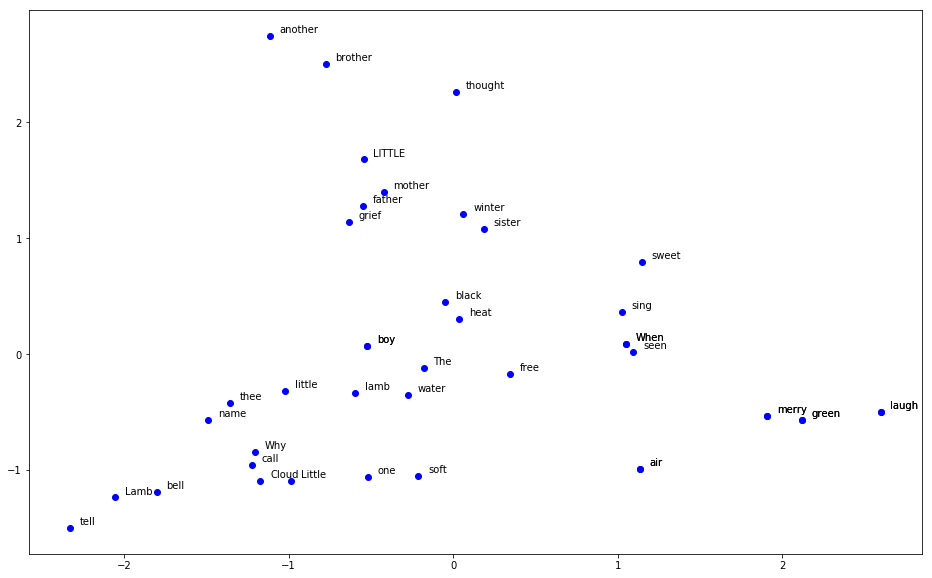

In [0]:
plt.figure(figsize=(16, 10))
plt.scatter(P[:, 0], P[:, 1], c='blue')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

## Reference:

https://github.com/facebookresearch/fastText